<a href="https://colab.research.google.com/github/MahalakshmiDSML/Machine-Learning-Assignment---4/blob/main/ML_Assignment_4_Logistic_Regression%2C_Decision_Tree%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Assignment 4 – Logistic Regression, Decision Tree, KNN**

##**Campus Placement Prediction**


##**Machine Learning Model Building Steps:-**

###**1.	Data Preprocessing:**


**1.1.	Load the Dataset: Load the dataset and perform an initial exploration to understand its structure and content.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/ML Assignment 4 – Logistic Regression, Decision Tree, KNN data.txt')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
df.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,9998,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,9999,8.9,0,3,2,87,4.8,1,1,71,85,1
9999,10000,8.4,0,1,1,66,3.8,0,0,62,66,0


In [ ]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.dtypes

,0
StudentID,int64
CGPA,float64
Internships,int64
Projects,int64
Workshops/Certifications,int64
AptitudeTestScore,int64
SoftSkillsRating,float64
ExtracurricularActivities,int64
PlacementTraining,int64
SSC_Marks,int64


In [ ]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.585400,0.731800,69.159400,74.501500,0.419700
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.492677,0.443044,10.430459,8.919527,0.493534
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,0.000000,55.000000,57.000000,0.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,0.000000,59.000000,67.000000,0.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,1.000000,70.000000,73.000000,0.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,1.000000,78.000000,83.000000,1.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,1.000000,90.000000,88.000000,1.000000


In [ ]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['PlacementStatus'].value_counts()

,count
PlacementStatus,
0,5803
1,4197


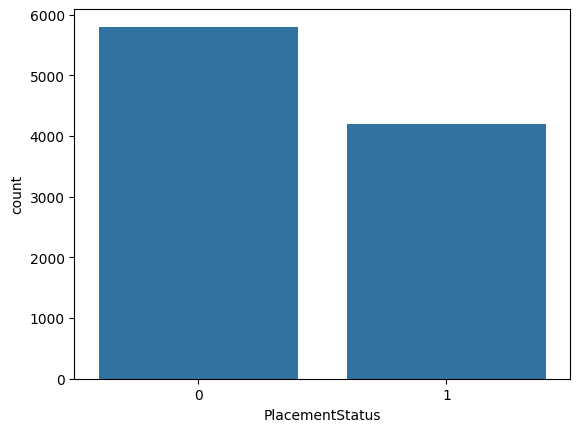

In [ ]:
sns.countplot(x='PlacementStatus', data=df)
plt.show()

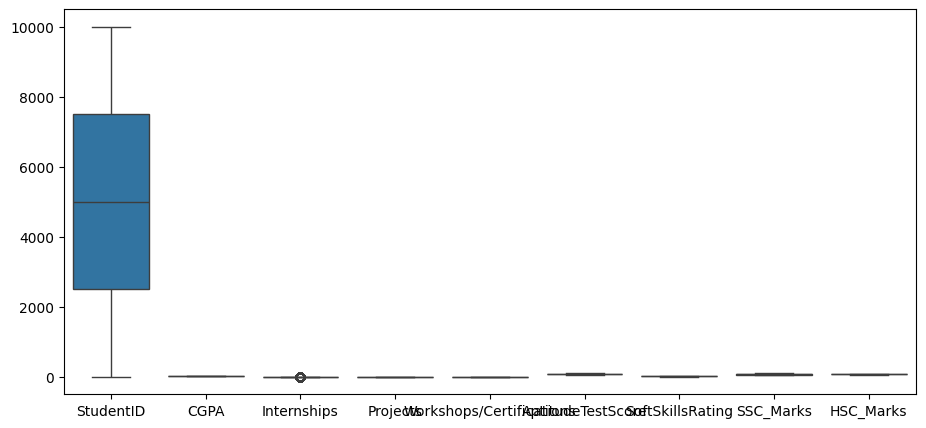

In [ ]:
plt.figure(figsize=(11,5))
sns.boxplot(df)
plt.show()

**Summary: In this chart there is no outliers.**

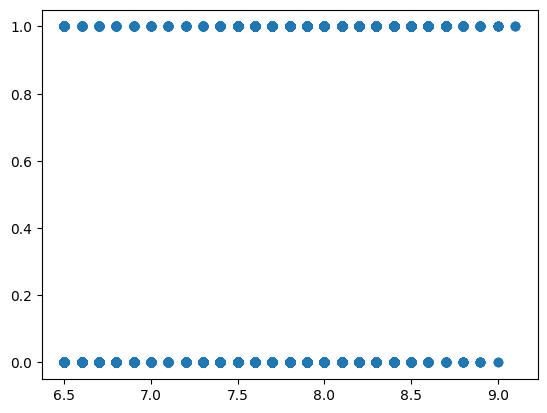

In [ ]:
plt.scatter(df['CGPA'],df['PlacementStatus'])
plt.show()

**1.2.	Handle Missing Values: Check for and handle any missing values in the dataset if present.**

In [ ]:
df.isna().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
nullcount=df.isna().sum()
nullcount[nullcount>0]

,0


**Summary: No missing value here.Suppose present any missing value to impute categorical column in mode type and numeric column to impute mean value.**

**1.3.	Encode Categorical Features: Convert categorical features into numerical format using appropriate encoding techniques.**

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [ ]:
cat_col=['ExtracurricularActivities','PlacementTraining','PlacementStatus']
numerical_df = df.select_dtypes(include='number')

###**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['ExtracurricularActivities']=LabelEncoder().fit_transform(df['ExtracurricularActivities'])

In [ ]:
# df['ExtracurricularActivities','PlacementTraining','PlacementStatus']=LabelEncoder().fit_transform(df['ExtracurricularActivities','PlacementTraining','PlacementStatus'])
label=LabelEncoder()
df['PlacementTraining']=label.fit_transform(df['PlacementTraining'])
df['PlacementStatus']=label.fit_transform(df['PlacementStatus'])
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [ ]:
print(df[['ExtracurricularActivities','PlacementTraining','PlacementStatus']].head(2))

   ExtracurricularActivities  PlacementTraining  PlacementStatus
0                          0                  0                0
1                          1                  1                1


In [ ]:
df['PlacementStatus'].value_counts()

,count
PlacementStatus,
0,5803
1,4197


In [ ]:
df['PlacementTraining'].value_counts()

,count
PlacementTraining,
1,7318
0,2682


In [ ]:
df['ExtracurricularActivities'].value_counts()

,count
ExtracurricularActivities,
1,5854
0,4146


###**One-Hot Encoding**

In [ ]:
df_onehot=pd.get_dummies(df.PlacementStatus,prefix='PlacementStatus_')
df_onehot.head()

,PlacementStatus__0,PlacementStatus__1
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [ ]:
df_onehot=df_onehot.astype(int)
df_onehot.head()

,PlacementStatus__0,PlacementStatus__1
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
finaldf=pd.concat([df,df_onehot],axis=1)
finaldf.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,PlacementStatus__0,PlacementStatus__1
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0,1,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1,0,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0,1,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1,0,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1,0,1


**1.4.	Feature Selection: Select the relevant features and the target variable for your analysis.**

In [ ]:
finaldf.shape

(10000, 14)

In [ ]:
df.shape

(10000, 12)

In [ ]:
X=finaldf.drop(columns=['PlacementStatus','PlacementStatus__0','PlacementStatus__1'])
y=finaldf['PlacementStatus']

In [ ]:
X.shape

(10000, 11)

In [ ]:
y.shape

(10000,)

**1.5.	Data Splitting: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

**1.6.	Feature Scaling: Standardize or normalize numerical features using parameters derived from the training set, and apply the same scaling to the test set.**

###**Normalize**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_trainsc=scaler.fit_transform(X_train)
X_testsc=scaler.fit_transform(X_test)

###**Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

###**In Logistic Regression required StandardScaler for better performance.**




##**2.	Logistic Regression - Model Building and Evaluation:**

**2.1.	Model Building: Build a Logistic Regression model using the training dataset. Experiment with different values for the max_iter parameter e.g., LogisticRegression(max_iter=300).**


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(max_iter=300)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [ ]:
log_model.coef_

array([[-0.04154395,  0.24963698,  0.0083764 ,  0.22560793,  0.11131067,
         0.56430372,  0.3112301 ,  0.34021805,  0.40401159,  0.27998184,
         0.28257638]])

In [ ]:
log_model.intercept_

array([-0.60805634])

**2.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
log_pred=log_model.predict(X_test)
log_accuracy=accuracy_score(y_test,log_pred)
print("Accuracy Score:\n",accuracy_score(y_test,log_pred))
print("Classification Report:\n",classification_report(y_test,log_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,log_pred))

Accuracy Score:
 0.7945
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000

Confusion Matrix:
 [[952 220]
 [191 637]]


##**3.	Decision Tree - Model Building and Evaluation:**

**3.1.	Model Building: Build a Decision Tree model using the training dataset. Experiment with different values for the max_depth parameter to control the tree's depth and prevent overfitting.**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
max_depth_values =range(1,20)
acc_values=[]
for depth in max_depth_values:
  classifier=DecisionTreeClassifier(max_depth=depth,random_state=42)
  classifier.fit(X_train,y_train)

**3.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.**

In [ ]:
tree_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,tree_pred)
acc_values.append(acc)
print(f"max_depth={depth},Accuracy={acc:.4f}")

max_depth=19,Accuracy=0.7280


##**MAX_depth =5**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
classifier1=DecisionTreeClassifier(max_depth=5,random_state=42)
classifier1.fit(X_train,y_train)
tree_p=classifier1.predict(X_test)
tree_acc=accuracy_score(y_test,tree_p)
print(f"Decision Tree Accuracy: {tree_acc:.2f}")

Decision Tree Accuracy: 0.78


##**4.	K-Nearest Neighbors (KNN) - Model Building and Evaluation:**

**4.1.	Model Building: Build a KNN model using the training dataset. Experiment with different values of k (number of neighbors).**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

In [ ]:
k=5
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
k=8
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_pred)
print(f"KNN Accuracy:{knn_accuracy:.2f}")

KNN Accuracy:0.78


**k=8 KNN Accuracy:0.78**
**k=5 KNN Accuracy:0.77**

**4.2.	Model Evaluation: Evaluate the model on the testing dataset.**

In [ ]:
knn_pred=knn.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_pred)
print(f"KNN Accuracy:{knn_accuracy:.2f}")

KNN Accuracy:0.78


In [ ]:
print("Accuracy Score:\n",accuracy_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))

Accuracy Score:
 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81      1172
           1       0.76      0.68      0.71       828

    accuracy                           0.78      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.78      0.77      2000

Confusion Matrix:
 [[991 181]
 [269 559]]


**4.3.	Reporting: Report the accuracy score for each value of k and provide a brief interpretation of the results. Choose the best k value and justify your choice.**

In [ ]:
k_values=range(1,21)
accuracy_scoresknn=[]
for k in k_values:
  knn1=KNeighborsClassifier(n_neighbors=k)
  knn1.fit(X_train,y_train)
  Y_pred=knn1.predict(X_test)
  acc=accuracy_score(y_test,Y_pred)
  accuracy_scoresknn.append(acc)
  print(f"for={k},Accuracy={acc:.4f}")

for=1,Accuracy=0.7335
for=2,Accuracy=0.7390
for=3,Accuracy=0.7515
for=4,Accuracy=0.7570
for=5,Accuracy=0.7720
for=6,Accuracy=0.7675
for=7,Accuracy=0.7745
for=8,Accuracy=0.7750
for=9,Accuracy=0.7825
for=10,Accuracy=0.7795
for=11,Accuracy=0.7885
for=12,Accuracy=0.7875
for=13,Accuracy=0.7870
for=14,Accuracy=0.7885
for=15,Accuracy=0.7890
for=16,Accuracy=0.7860
for=17,Accuracy=0.7910
for=18,Accuracy=0.7930
for=19,Accuracy=0.7905
for=20,Accuracy=0.7915


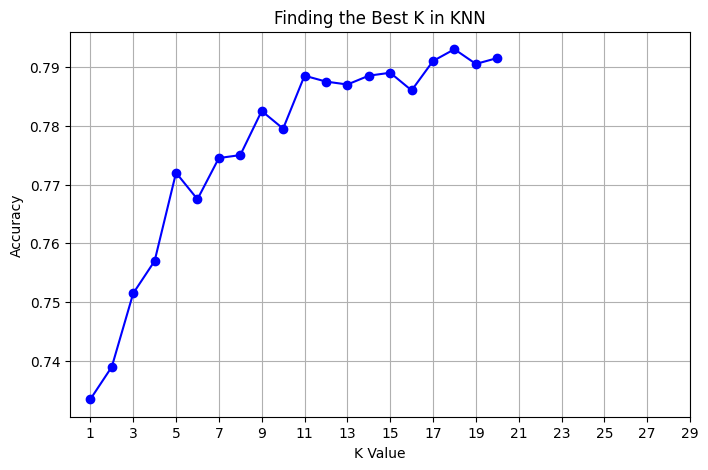

In [ ]:
# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scoresknn, marker='o', linestyle='-', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Finding the Best K in KNN")
plt.xticks(range(1, 30, 2))
plt.grid(True)
plt.show()

In [ ]:
best_k=k_values[np.argmax(accuracy_scoresknn)]
print(f"Best K value:{best_k},Highest Accuracy:{max(accuracy_scoresknn):.4f}")

Best K value:18,Highest Accuracy:0.7930


**Best K value:18,Highest Accuracy:0.7930.**

##**5.	Comparison and Analysis:**

**5.1.	Compare the accuracy scores of the three models.**


In [ ]:
print("\nCompare the accuracy scores of the three models:")
print(f"LOgistic Accuracy Score:{log_accuracy:.4f}")
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"KNN Accuracy:{knn_accuracy:.4f}")


Compare the accuracy scores of the three models:
LOgistic Accuracy Score:0.7945
Decision Tree Accuracy: 0.7790
KNN Accuracy:0.7750


**5.2.	Discuss which model performed best and why, based on the accuracy scores and other relevant factors.**

In [ ]:
best_model=max(zip(['Logistic Regression','Decision Tree','KNN'],[log_accuracy,tree_acc,knn_accuracy]),key=lambda X:X[1])
print(f"\n best model:{best_model[0]}, with accuracy:{best_model[1]:.2f}")


 best model:Logistic Regression, with accuracy:0.79


**Compare the accuracy scores of the three models:**
**LOgistic Accuracy Score:0.7945**
    Logistic Regression achieved the highest accuracy of 79%, best to the test data.

**Decision Tree Accuracy: 0.7790**
    Decision Tree had slightly lower accuracy (77%).

**KNN Accuracy:0.7750**
    KNN had very lower accuracy close to Decision Tree (77%).

**5.3.	Reflect on the strengths and weaknesses of each model in the context of this dataset.**

**This three model has slightly difference between accuracy 79%,77.9%,77.5%**.
 **This is close one model to anothe model first model is vary 2%.**
###**Logistic regreesion:**
  **High Aaccuracy compare another model.**
###**Decision Tree:**
   **Accuracy differ with Max_depth.**
###**KNN:**
  **Easy to point out the accuracy in chart. this is also differ from k values.**